sclaer: https://mkjjo.github.io/python/2019/01/10/scaler.html


In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
import collections

# Other Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

import optuna

import umap

In [2]:
train_df = pd.read_csv('./data/train.csv').drop('ID', axis=1)
train_df#.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [3]:
valid_df = pd.read_csv('./data/val.csv').drop('ID', axis=1)
valid_df#.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,...,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,...,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,...,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0


# scaling

In [4]:
v_columns = [f'V{i}' for i in range(1,31)]

In [6]:
scaler = MaxAbsScaler() # MinMaxScaler()
scaler.fit(train_df[v_columns])
train_df[v_columns] = scaler.transform(train_df[v_columns])
valid_df[v_columns] = scaler.transform(valid_df[v_columns])

# validation data 분석

In [7]:
colors = ['#0101DF', '#DF0101']

In [8]:
print('No Frauds', round(valid_df['Class'].value_counts()[0]/len(valid_df) * 100,2), '% of the dataset')
print('Frauds', round(valid_df['Class'].value_counts()[1]/len(valid_df) * 100,2), '% of the dataset')

X = valid_df.drop('Class', axis=1)
y = valid_df['Class']

# sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# for train_index, test_index in sss.split(X, y):
#     print("Train:", train_index, "Test:", test_index)
#     original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
#     original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# # We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# # original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# # Check the Distribution of the labels


# # Turn into an array
# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values

# # See if both the train and test label distribution are similarly distributed
# train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
# test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# print('-' * 100)

# print('Label Distributions: \n')
# print(train_counts_label/ len(original_ytrain))
# print(test_counts_label/ len(original_ytest))

No Frauds 99.89 % of the dataset
Frauds 0.11 % of the dataset


In [9]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

valid_df = valid_df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = valid_df.loc[valid_df['Class'] == 1]
non_fraud_df = valid_df.loc[valid_df['Class'] == 0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_valid_df = normal_distributed_df.sample(frac=1, random_state=42)

new_valid_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
9326,0.019154,0.013241,-0.008568,0.166350,0.009784,-0.012262,0.000937,0.003458,-0.071978,-0.007955,...,-0.006418,-0.001198,-0.006556,0.038881,0.023348,0.002428,0.001868,-0.001707,-0.228245,1
677,0.015199,0.056300,-0.228750,0.447526,0.023094,-0.104385,-0.033969,0.010659,-0.175017,-0.161628,...,0.016361,0.005370,-0.058329,-0.097605,0.139721,0.055526,0.004386,-0.001629,-0.868652,1
3224,0.021679,0.001440,0.016704,0.050900,-0.012083,-0.026624,0.000510,-0.003308,0.028295,-0.008690,...,-0.049848,0.000051,0.110732,0.045737,0.085393,-0.001769,0.000444,-0.000791,-0.545440,0
9658,0.019671,0.001560,0.027689,0.146704,-0.001680,0.038289,-0.009753,0.003409,0.001842,0.017778,...,-0.032570,-0.004326,-0.243772,0.048725,0.010558,0.003349,0.001019,0.002955,-0.211399,0
1547,-0.327525,0.159338,-0.659481,0.366166,-0.342868,-0.158503,-0.337222,0.244019,-0.301722,-0.370460,...,-0.140783,-0.008843,0.023790,0.128480,-0.069873,0.146267,0.014248,0.006051,-0.660306,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


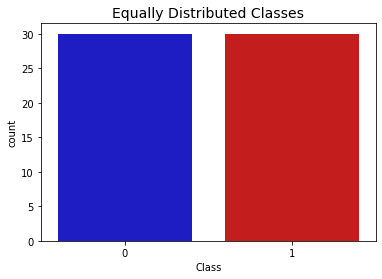

In [10]:
print('Distribution of the Classes in the subsample dataset')
print(new_valid_df['Class'].value_counts()/len(new_valid_df))

sns.countplot('Class', data=new_valid_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

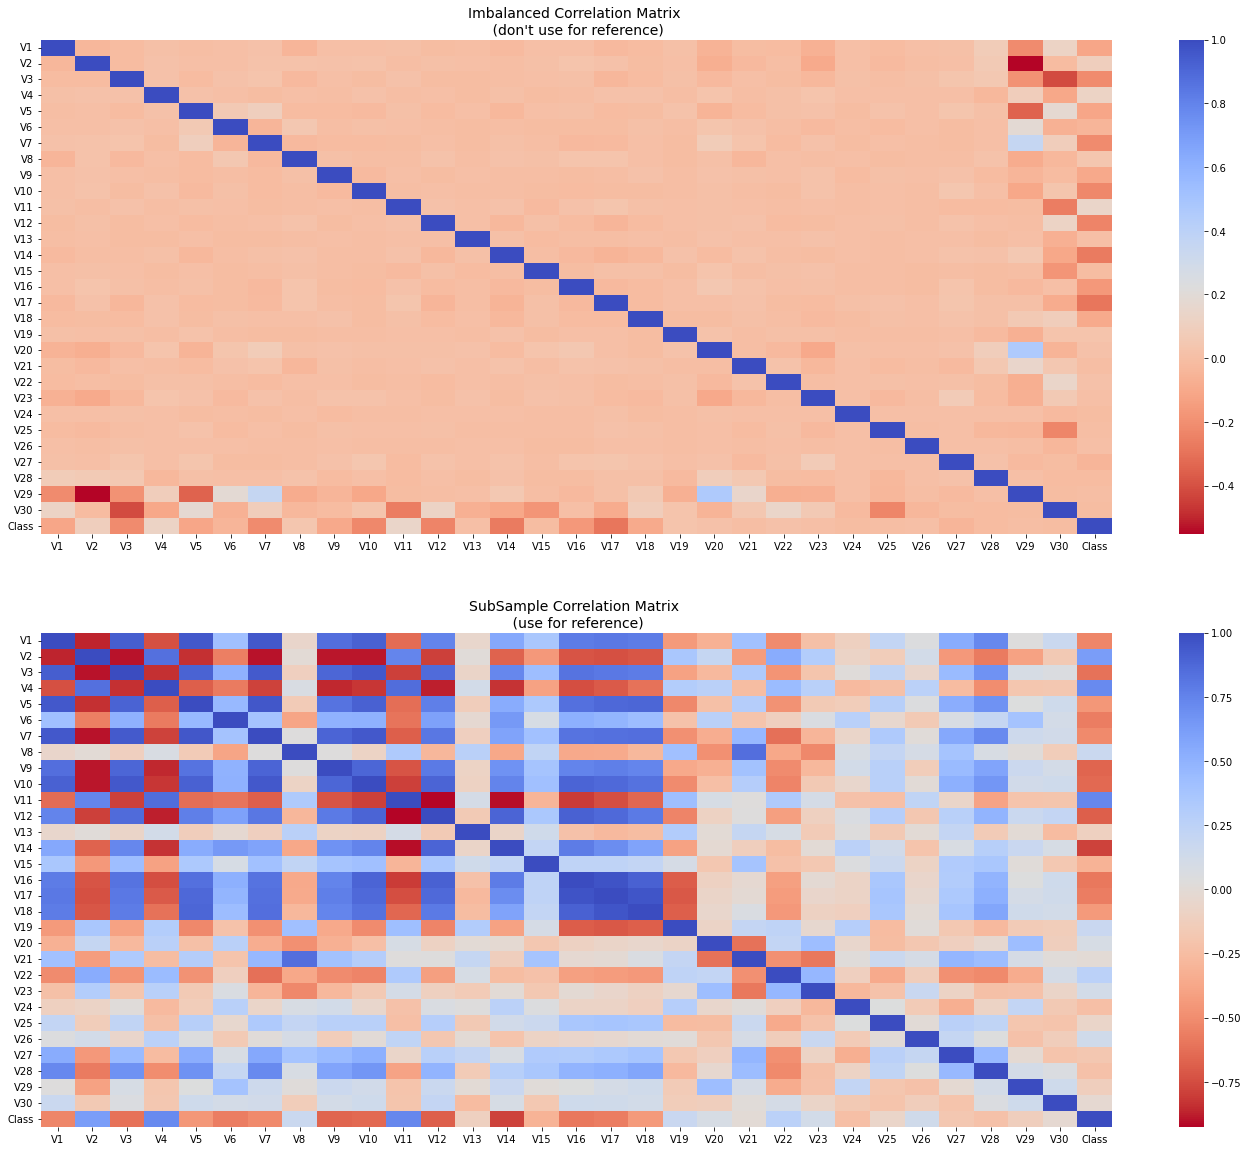

In [11]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = valid_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_valid_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [12]:
key_reverse = list(sub_sample_corr['Class'][:-1].sort_values().keys())

In [13]:
['V14', 'V12', 'V9', 'V10', 'V3', 'V16', 'V17', 'V7', 'V6', 'V5', 'V1', 'V18', 'V15', 'V24', 'V22', 'V2', 'V4', 'V11']

['V14',
 'V12',
 'V9',
 'V10',
 'V3',
 'V16',
 'V17',
 'V7',
 'V6',
 'V5',
 'V1',
 'V18',
 'V15',
 'V24',
 'V22',
 'V2',
 'V4',
 'V11']

In [14]:
for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values().items()):
    print(idx, k, v)

0 V14 -0.7834312781345506
1 V12 -0.6909341035336553
2 V9 -0.6628731456272046
3 V10 -0.6533644321973654
4 V3 -0.6125922113667371
5 V16 -0.5899835128018163
6 V6 -0.5680037393764166
7 V17 -0.567642619501677
8 V1 -0.5297137951024106
9 V7 -0.5160709765005086
10 V5 -0.4563957314042961
11 V18 -0.4421231808240588
12 V15 -0.3156205904406712
13 V24 -0.23898576445231343
14 V28 -0.22357599408720047
15 V27 -0.18591541568861455
16 V29 -0.12259824731040006
17 V13 -0.11059086553474254
18 V25 -0.0678115704797597
19 V30 -0.029410528860780508
20 V21 -0.004054048122413167
21 V20 0.0870280672749258
22 V23 0.11925486890316253
23 V26 0.13267509686191095
24 V8 0.16526396382761654
25 V19 0.17545602758519868
26 V22 0.26238127139852585
27 V2 0.6222657091686178
28 V4 0.7203796608903864
29 V11 0.7300086041416677


In [15]:
a = key_reverse[:12]
b = key_reverse[-3:]
use_columns = a + b
print(a)
print(b)
print(len(use_columns))

['V14', 'V12', 'V9', 'V10', 'V3', 'V16', 'V6', 'V17', 'V1', 'V7', 'V5', 'V18']
['V2', 'V4', 'V11']
15


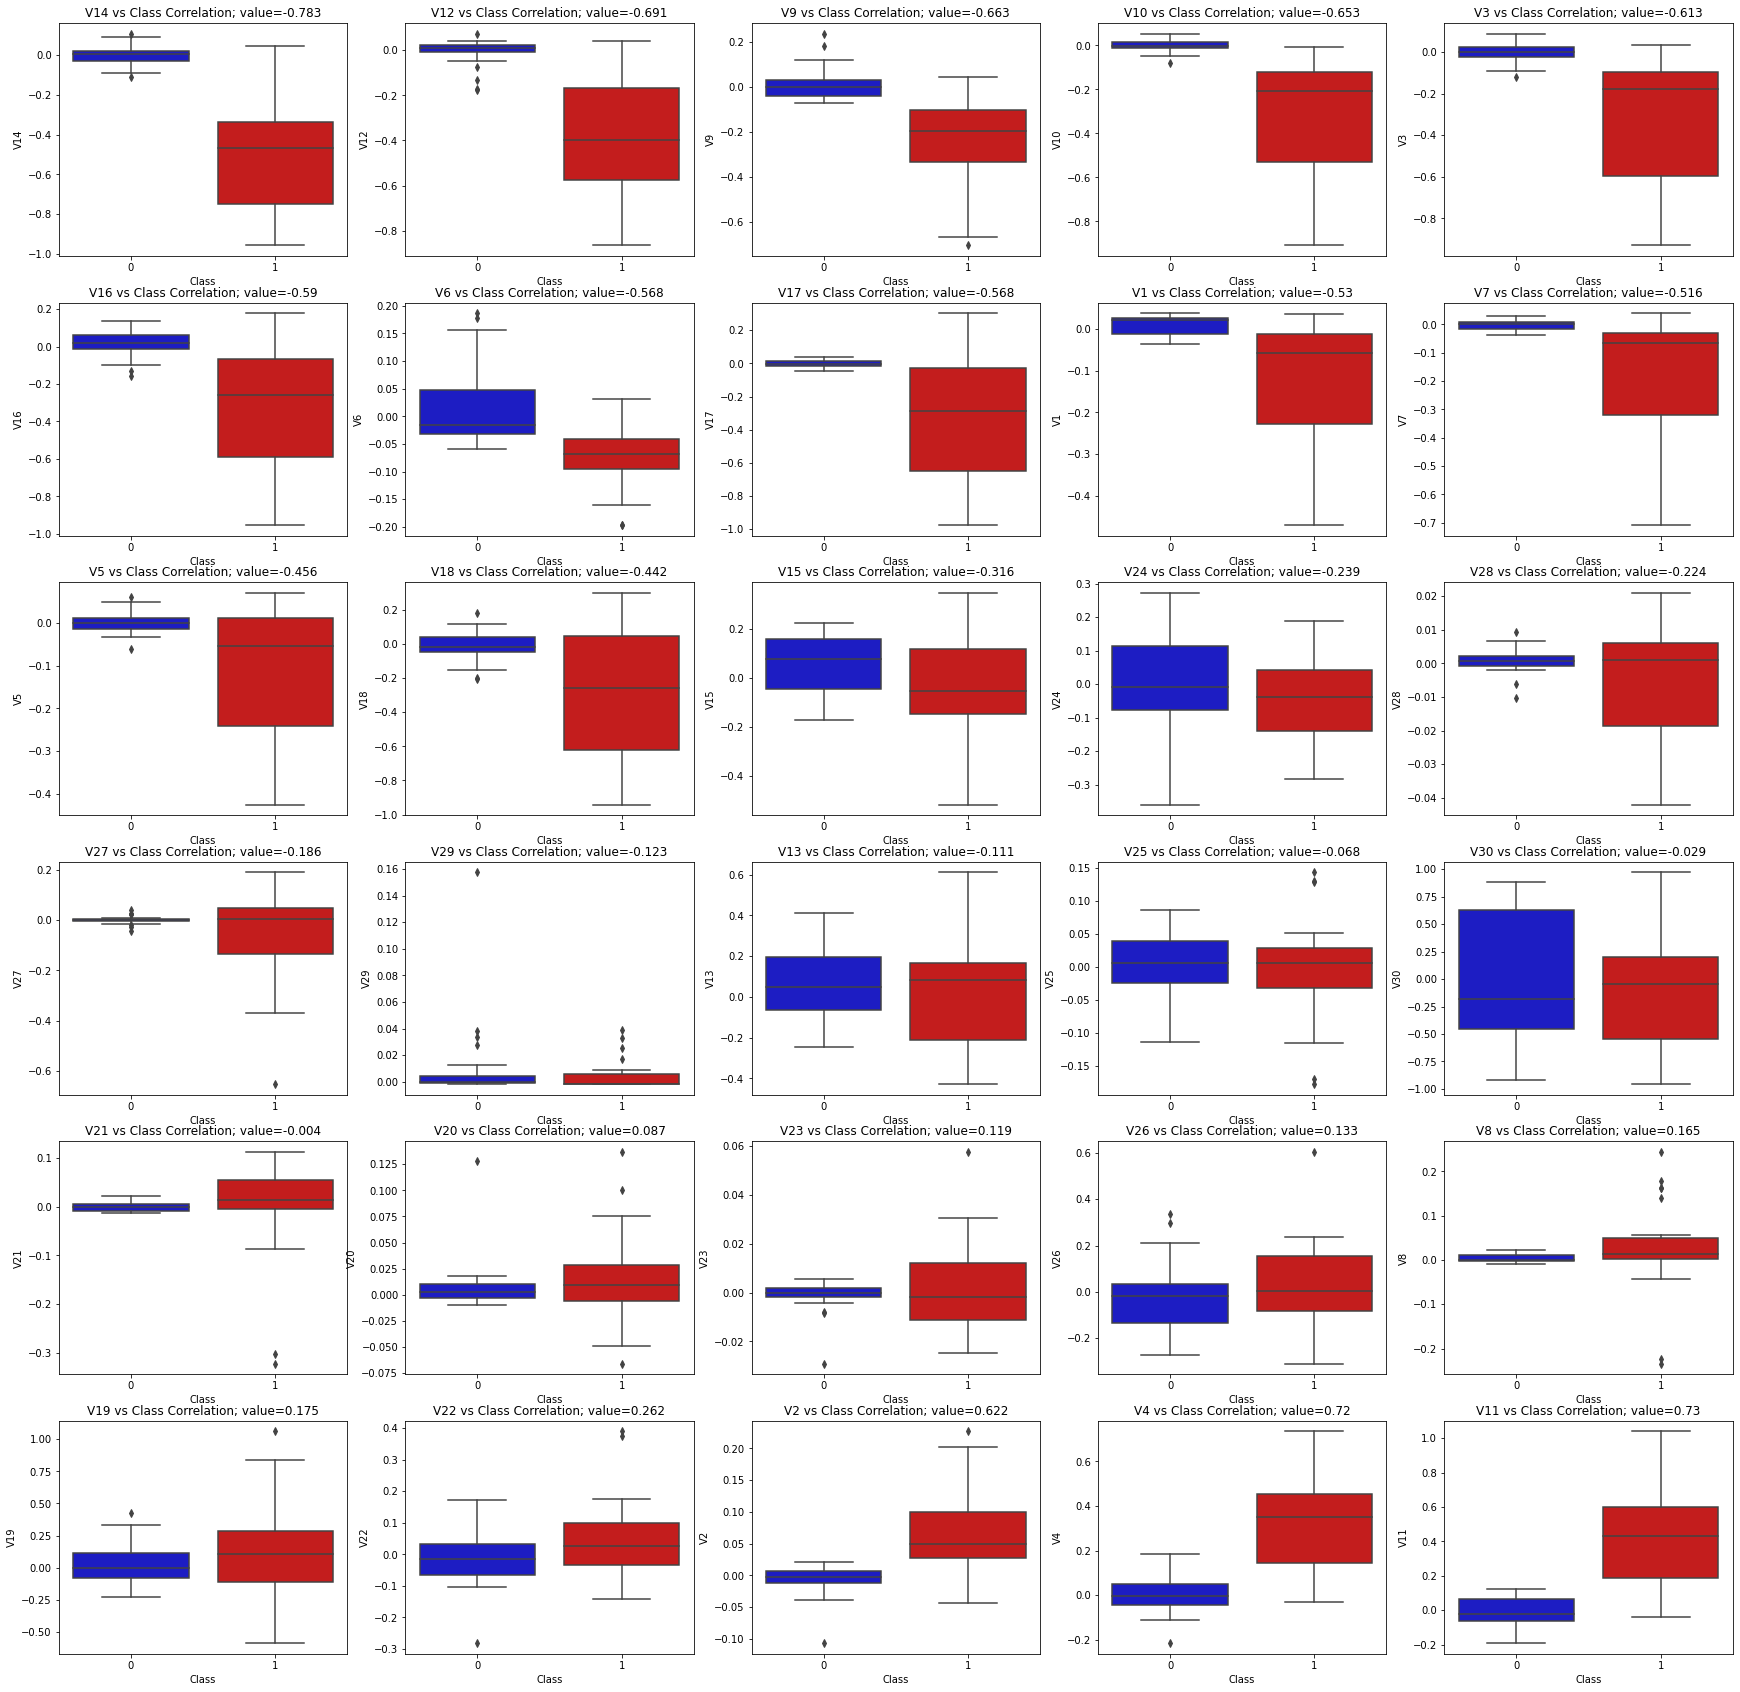

In [16]:
f, axes = plt.subplots(nrows=6, ncols=5, figsize=(30,30))

for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values().items()):
    i, j = divmod(idx, 5)
    sns.boxplot(x="Class", y=k, data=new_valid_df, palette=colors, ax=axes[i, j])
    axes[i,j].set_title(f'{k} vs Class Correlation; value={round(v,3)}')

In [17]:
# from scipy.stats import norm

# f, axes = plt.subplots(nrows=6, ncols=5, figsize=(30,30))

# for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values().items()):
#     # print(idx, k, v)
#     i, j = divmod(idx, 5)
#     v_fraud_dist = new_valid_df[k].loc[new_valid_df['Class'] == 1].values
#     sns.distplot(v_fraud_dist, ax=axes[i,j], fit=norm, color='#FB8861')
#     axes[i,j].set_title(f'{k} Distribution', fontsize=14)

In [18]:
for idx, (k,v) in enumerate(sub_sample_corr['Class'][:-1].sort_values()[:5].items()):
    v_fraud = new_valid_df[k].loc[new_valid_df['Class']==1].values
    q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    v_iqr = q75 - q25
    print(f'iqr: {v_iqr}')
    
    v_cut_off = v_iqr * 1.5
    v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
    print(f'Cut off: {v_cut_off}')
    print(f'{k} Lower: {v_lower}')
    print(f'{k} upper: {v_upper}')
    
    outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
    print(f'Feature {k} Outliers for Fraud Cases: {len(outliers)}'.format())
    print(f'{k} outliers:{outliers}')

    new_valid_df = new_valid_df.drop(new_valid_df[(new_valid_df[k] > v_upper) | (new_valid_df[k] < v_lower)].index)
    print('Number of Instances after outliers removal: {}'.format(len(new_valid_df)))
    print('----' * 44)

Quartile 25: -0.746733224874017 | Quartile 75: -0.33479639988945925
iqr: 0.4119368249845578
Cut off: 0.6179052374768367
V14 Lower: -1.3646384623508538
V14 upper: 0.2831088375873774
Feature V14 Outliers for Fraud Cases: 0
V14 outliers:[]
Number of Instances after outliers removal: 60
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.5772580118123027 | Quartile 75: -0.1689270624257557
iqr: 0.408330949386547
Cut off: 0.6124964240798205
V12 Lower: -1.1897544358921233
V12 upper: 0.4435693616540648
Feature V12 Outliers for Fraud Cases: 0
V12 outliers:[]
Number of Instances after outliers removal: 60
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.334446005334491 | Quartile 75: -0.10543223363373491
iqr: 0.2290

In [19]:
# New_df is from the random undersample data (fewer instances)
X = new_valid_df.drop('Class', axis=1)[use_columns]
y = new_valid_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='pca').fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


T-SNE took 0.44 s
PCA took 0.00064 s
Truncated SVD took 0.013 s


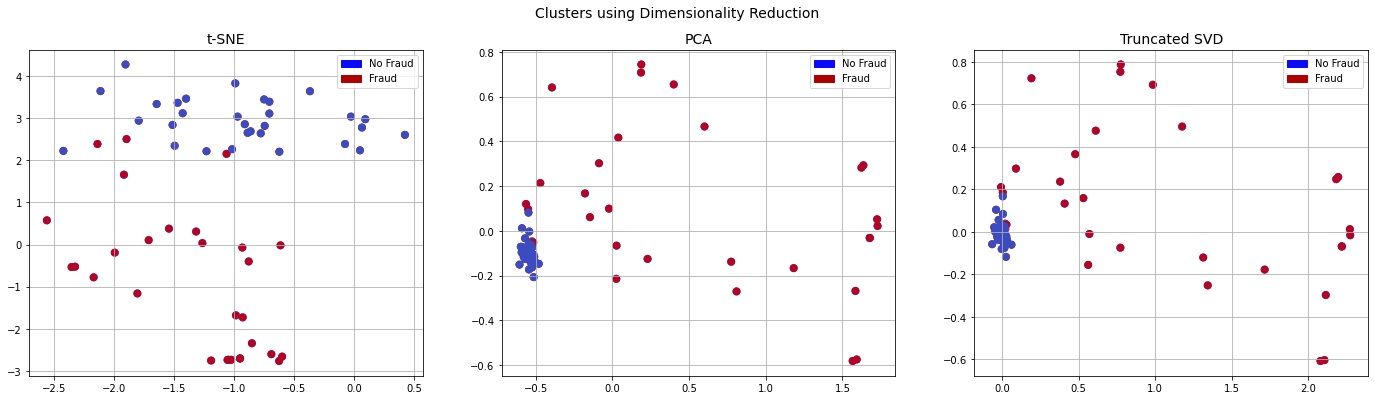

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# KNN labeling

In [515]:
# use_columns = v_columns

In [516]:
print(f'v cnt: {len(use_columns)} ::::', end=' ')
for c in use_columns:
    print(c, sep='', end=' ')

v cnt: 15 :::: V14 V12 V9 V10 V3 V16 V6 V17 V1 V7 V5 V18 V2 V4 V11 

In [517]:
train_df = pd.read_csv('./data/train.csv').drop('ID', axis=1)
valid_df = pd.read_csv('./data/val.csv').drop('ID', axis=1)

In [518]:
train_df = train_df[use_columns]
valid_df = valid_df[use_columns+['Class']]

In [519]:
# v_columns = [f'V{i}' for i in range(1,31)]
scaler = MaxAbsScaler() # MinMaxScaler()
scaler.fit(train_df[use_columns])
train_df[use_columns] = scaler.transform(train_df[use_columns])
valid_df[use_columns] = scaler.transform(valid_df[use_columns])

In [520]:
fraud_ratio = valid_df['Class'].value_counts()[1]/len(valid_df)
fraud_ratio

0.0010540369615627855

In [521]:
X = valid_df.drop('Class', axis=1).values
y = valid_df['Class'].values

In [522]:
# 차원 축소해서 knn으로 라벨링

# reducer = umap.UMAP(n_components=5)
# X = reducer.fit_transform(X)
# X.shape

In [523]:
# plt.scatter(
#     X[:, 0],
#     X[:, 1],
#     c=[sns.color_palette()[x] for x in y])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Fraud dataset', fontsize=24)

In [524]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='brute', n_jobs=-1)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=1,
                     weights='distance')

In [525]:
# t = reducer.transform(train_df.values)
probs = neigh.predict_proba(train_df.values)

In [526]:
neigh.predict(train_df.values).sum()

121

In [527]:
cnt = 0
train_class = np.zeros(len(train_df), dtype=int)
for idx in np.flip(np.argsort(probs[:,1])):
    cnt += 1
    if probs[idx,1] < 0.5:
        break
    # if probs[idx,1] <= 0:
    #     break
    train_class[idx] = 1
train_df['Class'] = train_class

In [528]:
print(len(train_df[train_df['Class']==1]))
print(len(train_df[train_df['Class']==1])/len(train_df))

121
0.0010628766184712145


# train

In [529]:
X = train_df.drop('Class', axis=1)
y = train_df['Class']

# stratSplit = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

# for train_index, test_index in stratSplit.split(X,y):
#     print("Train:", train_index.shape, "Test:", test_index.shape)
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(len(y_train[y_train==1]), len(y_train[y_train==0]), len(y_train[y_train==1])/len(y_train) * 100)
#     print(len(y_test[y_test==1]), len(y_test[y_test==0]), len(y_train[y_train==1])/len(y_train)* 100)
#     break


In [530]:
# # SMOTE unlael 데이터 확장
# oversampler = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42, n_jobs=-1)
# X, y = oversampler.fit_resample(X, y)

# print(len(y[y==0]), len(y[y==1]))

In [531]:
def RF_objective(trial: optuna.trial.Trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 600),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 800, 1500),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 7),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced']), 
    }
   
    model = RandomForestClassifier(**params,
                                   n_jobs=-1,
                                   random_state=42)

    model.fit(X, y)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1)
    f1_mean = score.mean()

    return f1_mean

In [532]:
#Execute optuna and set hyperparameters
RF_study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
RF_study.optimize(RF_objective, n_trials=10)

[I 2022-07-13 00:24:33,348] A new study created in memory with name: no-name-574d2dc7-458e-4ee6-b739-d875e01dd905
[I 2022-07-13 00:24:56,298] Trial 0 finished with value: 0.8906485671191554 and parameters: {'n_estimators': 573, 'max_depth': 12, 'max_leaf_nodes': 1260, 'min_samples_leaf': 57, 'min_samples_split': 7, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8906485671191554.
[I 2022-07-13 00:25:05,926] Trial 1 finished with value: 0.8809982174688058 and parameters: {'n_estimators': 241, 'max_depth': 5, 'max_leaf_nodes': 861, 'min_samples_leaf': 34, 'min_samples_split': 4, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8906485671191554.
[I 2022-07-13 00:25:22,175] Trial 2 finished with value: 0.8929785810858892 and parameters: {'n_estimators': 423, 'max_depth': 7, 'max_leaf_nodes': 1128, 'min_samples_leaf': 28, 'min_samples_split': 4, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.8929785810858892.
[I 2022-07-13 00:25:43,739] Trial 3 finished with

In [533]:
RF_study.best_params

{'n_estimators': 347,
 'max_depth': 13,
 'max_leaf_nodes': 891,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'class_weight': 'balanced'}

In [534]:
#Create an instance with tuned hyperparameters
rfc = RandomForestClassifier(**RF_study.best_params,
                              n_jobs=-1,
                              random_state=42)

In [535]:
rfc.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=13,
                       max_leaf_nodes=891, min_samples_split=4,
                       n_estimators=347, n_jobs=-1, random_state=42)

In [536]:
y_pred = rfc.predict(X)

In [537]:
# rfc.predict_proba(X_test)

In [538]:
print(classification_report(y, y_pred, target_names=['No Frauds', 'Frauds']))

              precision    recall  f1-score   support

   No Frauds       1.00      1.00      1.00    113721
      Frauds       0.98      1.00      0.99       121

    accuracy                           1.00    113842
   macro avg       0.99      1.00      1.00    113842
weighted avg       1.00      1.00      1.00    113842



In [539]:
f1score = classification_report(y, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)['macro avg']['f1-score']
f1score

0.9958972425802806

# inference

In [540]:
test_df = pd.read_csv('./data/test.csv')
ids = test_df['ID']
test_df = test_df[use_columns]

In [541]:
test_df

,V14,V12,V9,V10,V3,V16,V6,V17,V1,V7,V5,V18,V2,V4,V11
0,-0.311169,-0.617801,0.363787,0.090794,2.536347,-0.470401,0.462388,0.207971,-1.359807,0.239599,-0.338321,0.025791,-0.072781,1.378155,-0.551600
1,-0.143772,1.065235,-0.255425,-0.166974,0.166480,0.463917,-0.082361,-0.114805,1.191857,-0.078803,0.060018,-0.183361,0.266151,0.448154,1.612727
2,-1.119670,0.538196,0.817739,0.753074,1.548718,-0.451449,0.095921,-0.237033,-1.158233,0.592941,-0.407193,-0.038195,0.877737,0.403034,-0.822843
3,0.167372,-0.153826,0.464960,-0.099254,0.045371,-0.443587,0.272708,0.002821,1.229658,-0.005159,0.191881,-0.611987,0.141004,1.202613,-1.416907
4,0.362832,-0.326143,-0.558895,0.309755,-0.874300,-0.129487,3.317027,-0.809979,0.384978,0.470455,2.924584,0.359985,0.616109,-0.094019,-0.259116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142498,1.122674,-0.453235,-0.285670,-0.111640,-0.635891,-1.431897,-1.014307,0.939328,0.219529,0.427126,-0.152971,-0.002373,0.881246,0.960928,-1.109232
142499,-0.858719,0.453596,1.159498,-0.594242,1.189786,-0.644646,5.519980,0.447184,-1.775135,-1.518185,1.196063,0.388721,-0.004235,0.331096,-1.264072
142500,-0.675143,0.915802,0.584800,-0.975926,2.035030,-0.711757,1.058415,-0.025693,-0.732789,0.024330,0.868229,-1.221179,-0.055080,-0.738589,-0.150189
142501,-0.510602,0.063119,0.432454,-0.484782,-3.249640,0.140716,3.031260,0.313502,1.919565,-0.296827,2.630515,0.395652,-0.301254,-0.557828,0.411614


In [542]:
test_df[use_columns] = scaler.transform(test_df[use_columns])

In [543]:
y_pred = rfc.predict(test_df)

In [544]:
print(len(y_pred[y_pred==0]))
print(len(y_pred[y_pred==1]))
print(len(y_pred[y_pred==1])/len(y_pred))
inference_fraud_ratio = len(y_pred[y_pred==1])/len(y_pred) * 100
print(inference_fraud_ratio)

142210
293
0.002056097064623201
0.2056097064623201


In [545]:
test_df['Class'] = y_pred
test_df['ID'] = ids

In [546]:
path = f'./rfc-{round(inference_fraud_ratio,5)}-{round(f1score, 2)}.csv'
print(path)

./rfc-0.20561-1.0.csv


In [547]:
test_df.to_csv(path, columns=['ID','Class'], index=False)